In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
image_path = 'test_code/B00001.png'
images_path = [
    image_path,
    "output.png",
    "wb.png",
]

## Histogram Analysis: 

Plot the intensity histogram to understand the distribution of pixel values. Noise often appears as additional peaks or spread in the histogram, especially in low-intensity ranges.

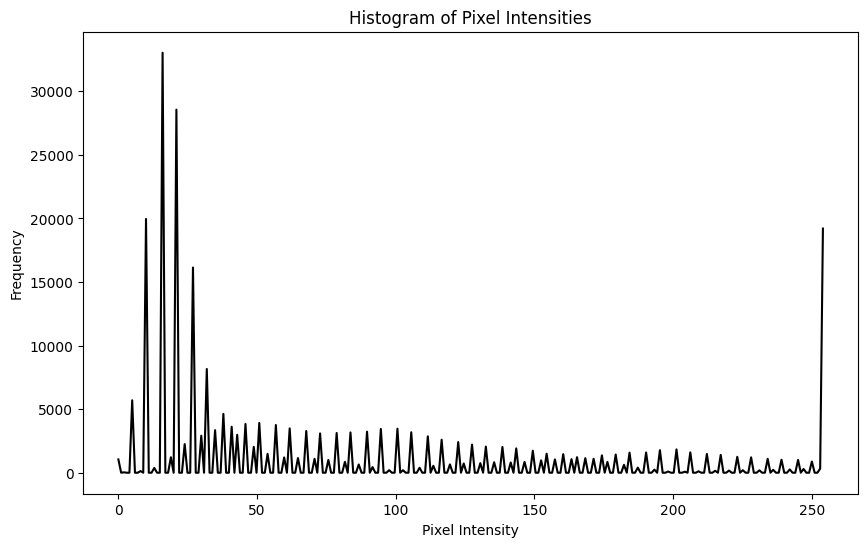

Mean Intensity: 80.77153015136719
Standard Deviation: 79.05653078929912


In [3]:
# Load the PIV image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Calculate the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.show()

# Optional: Print basic statistics for analysis
mean_intensity = np.mean(image)
std_intensity = np.std(image)
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")

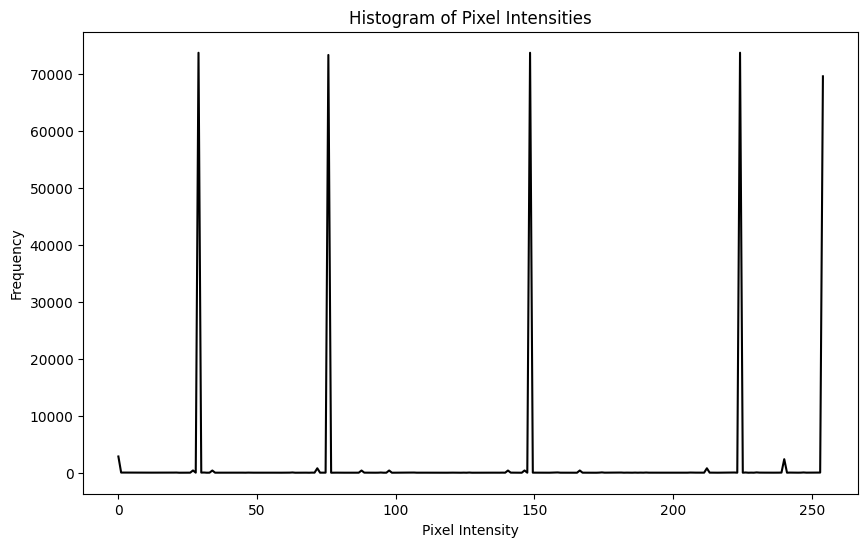

Mean Intensity: 144.7034956155381
Standard Deviation: 85.90214750673239


In [8]:
# Load the PIV image in grayscale
image = cv2.imread(images_path[1], cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Calculate the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.show()

# Optional: Print basic statistics for analysis
mean_intensity = np.mean(image)
std_intensity = np.std(image)
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")

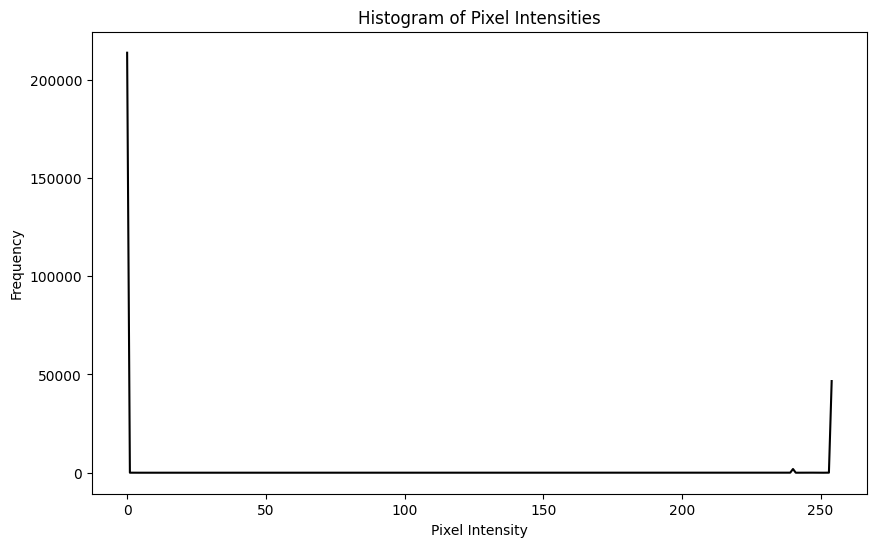

Mean Intensity: 47.567108646676424
Standard Deviation: 98.94883286430826


In [9]:
# Load the PIV image in grayscale
image = cv2.imread(images_path[2], cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Calculate the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(bin_edges[0:-1], histogram, color='black')
plt.show()

# Optional: Print basic statistics for analysis
mean_intensity = np.mean(image)
std_intensity = np.std(image)
print(f"Mean Intensity: {mean_intensity}")
print(f"Standard Deviation: {std_intensity}")

## Fourier Analysis: 

Transform the image into the frequency domain using a 2D Fast Fourier Transform (FFT). High-frequency components typically represent noise. You can analyze the power spectrum to understand the noise frequency characteristics.

http://www.cas.usf.edu/~cconnor/pot_fields_lectures/Lecture11_mag_2Dfft.pdf

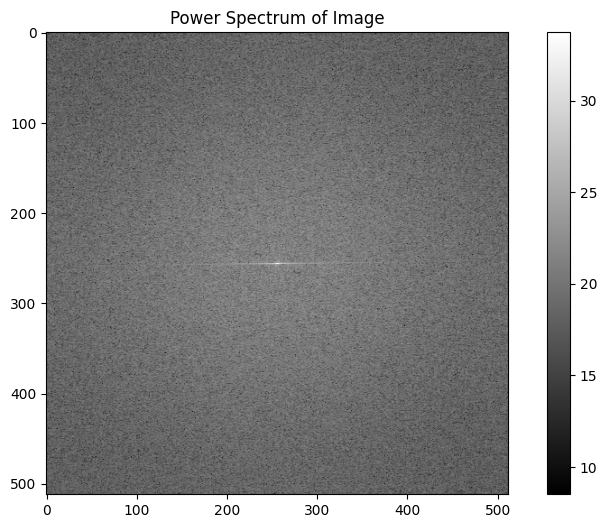

In [14]:
image = cv2.imread(images_path[0], cv2.IMREAD_GRAYSCALE)

# Perform 2D FFT on the image
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = np.abs(fft_shifted)

# Calculate the power spectrum
power_spectrum = magnitude_spectrum ** 2

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.title("Power Spectrum of Image")
plt.imshow(np.log(1 + power_spectrum), cmap='gray')
plt.colorbar()
plt.show()

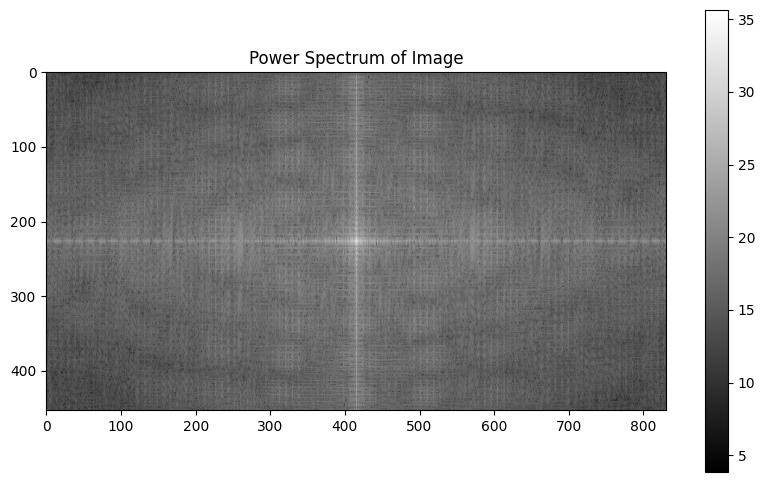

In [15]:
image = cv2.imread("output.png", cv2.IMREAD_GRAYSCALE)

# Perform 2D FFT on the image
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = np.abs(fft_shifted)

# Calculate the power spectrum
power_spectrum = magnitude_spectrum ** 2

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.title("Power Spectrum of Image")
plt.imshow(np.log(1 + power_spectrum), cmap='gray')
plt.colorbar()
plt.show()

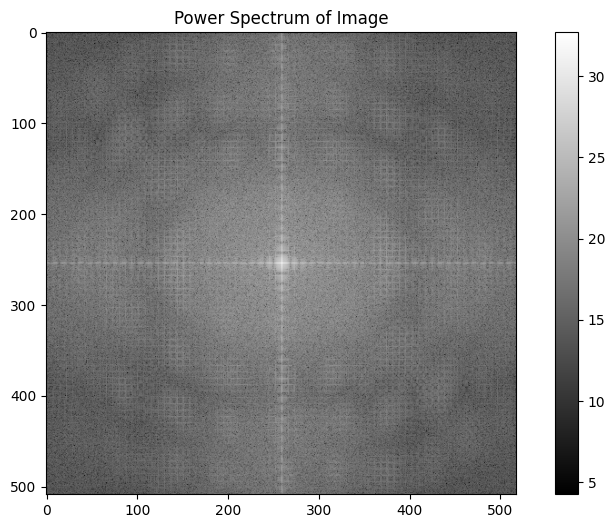

In [10]:
image = cv2.imread("wb.png", cv2.IMREAD_GRAYSCALE)

# Perform 2D FFT on the image
fft_image = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_image)
magnitude_spectrum = np.abs(fft_shifted)

# Calculate the power spectrum
power_spectrum = magnitude_spectrum ** 2

# Plot the power spectrum
plt.figure(figsize=(10, 6))
plt.title("Power Spectrum of Image")
plt.imshow(np.log(1 + power_spectrum), cmap='gray')
plt.colorbar()
plt.show()

## Wavelet Transform: 

Decompose the image using wavelets to analyze noise across different scales. This can be helpful for identifying spatially localized noise and separating it from meaningful features.

Text(0.5, 1.0, 'Vertical Detail (cV)')

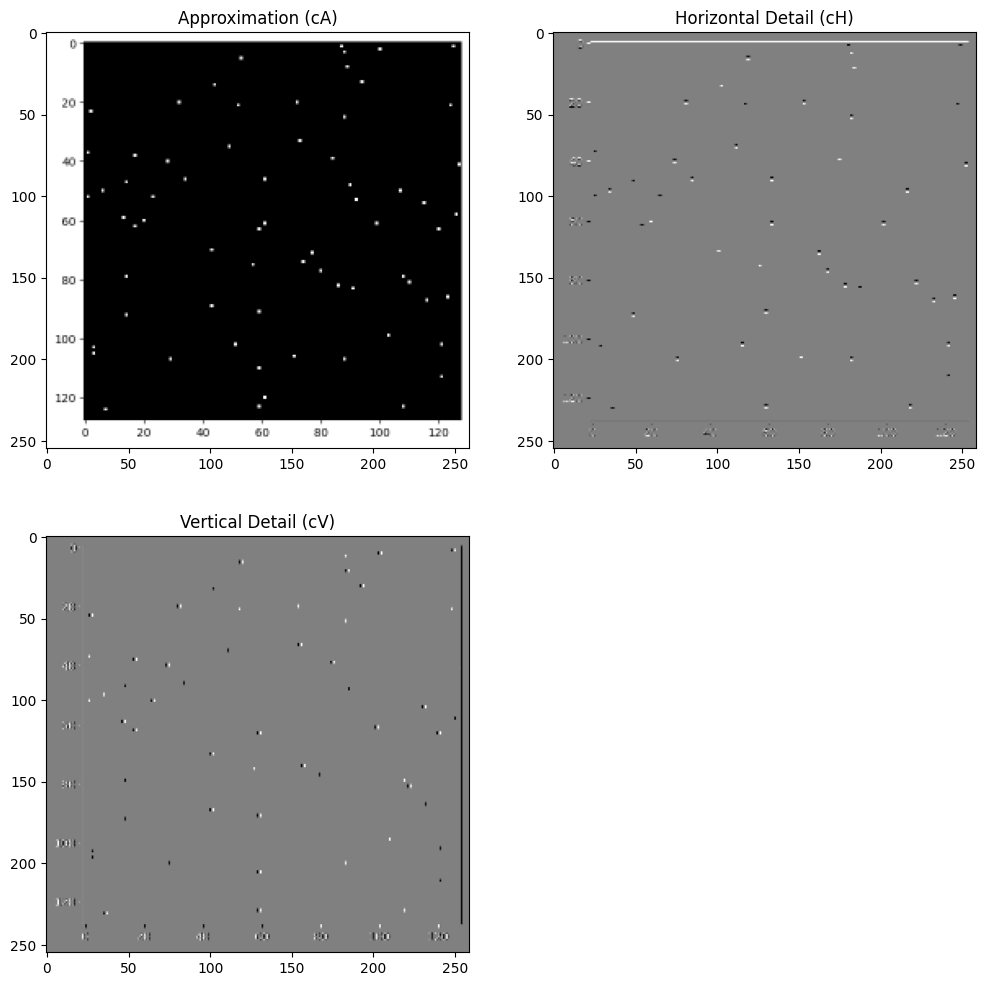

In [11]:
import pywt

image = cv2.imread("wb.png", cv2.IMREAD_GRAYSCALE)

# Perform 2D Discrete Wavelet Transform (DWT) on the image
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

# Plot the wavelet coefficients
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(cA, cmap='gray')
plt.title("Approximation (cA)")

plt.subplot(222)
plt.imshow(cH, cmap='gray')
plt.title("Horizontal Detail (cH)")

plt.subplot(223)
plt.imshow(cV, cmap='gray')
plt.title("Vertical Detail (cV)")


Text(0.5, 1.0, 'Diagonal Detail (cD)')

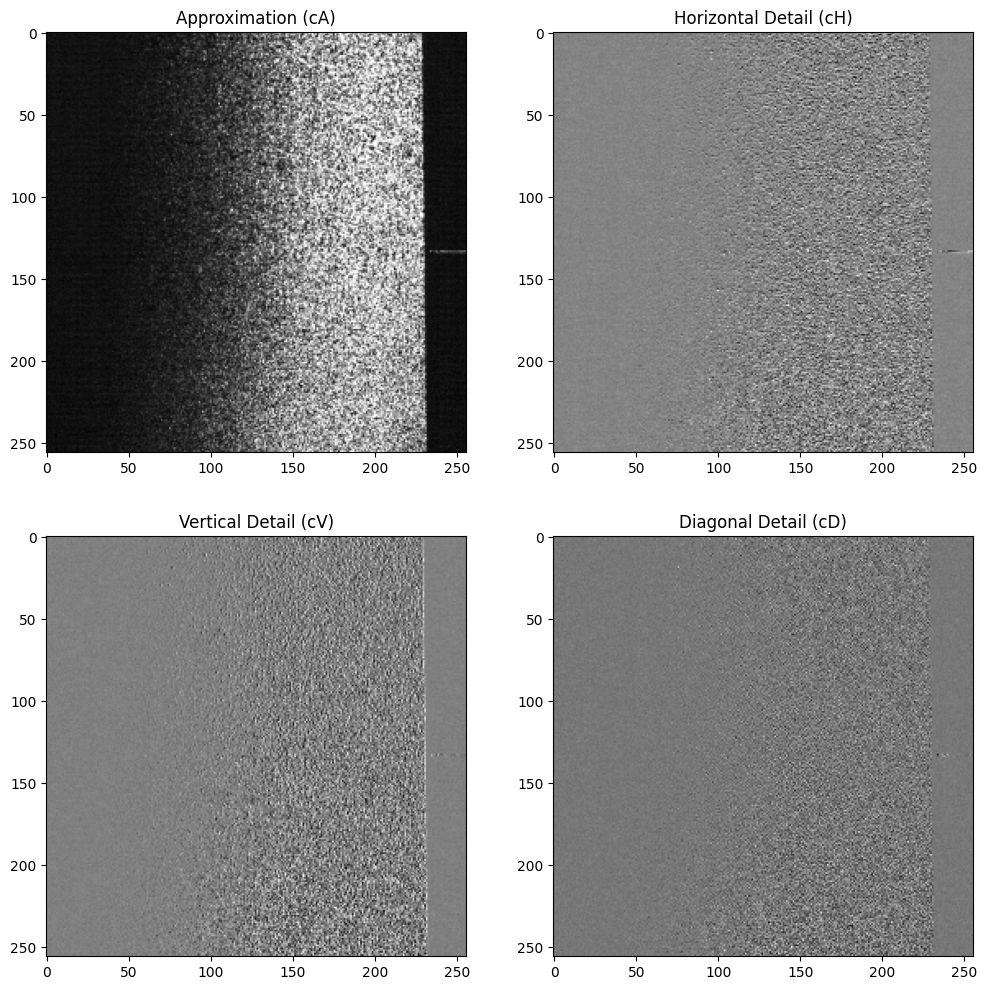

In [13]:
import pywt

image = cv2.imread(images_path[0], cv2.IMREAD_GRAYSCALE)

# Perform 2D Discrete Wavelet Transform (DWT) on the image
coeffs = pywt.dwt2(image, 'haar')
cA, (cH, cV, cD) = coeffs

# Plot the wavelet coefficients
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(cA, cmap='gray')
plt.title("Approximation (cA)")

plt.subplot(222)
plt.imshow(cH, cmap='gray')
plt.title("Horizontal Detail (cH)")

plt.subplot(223)
plt.imshow(cV, cmap='gray')
plt.title("Vertical Detail (cV)")

plt.subplot(224)
plt.imshow(cD, cmap='gray')
plt.title("Diagonal Detail (cD)")
plt.show()

I don't think that apply fft to the image and use the power spectrun is a features that can help infer the velocity field. The power spectrum give more trends about what is in the image. 

## Wavelet denoising 

is a technique that leverages the power of wavelet transforms to effectively remove noise from images and signals. It's particularly useful for signals with both smooth and sharp features, as wavelets can capture both low-frequency and high-frequency components.

Image Processing: Removing noise from images captured in low-light conditions or with sensor noise.

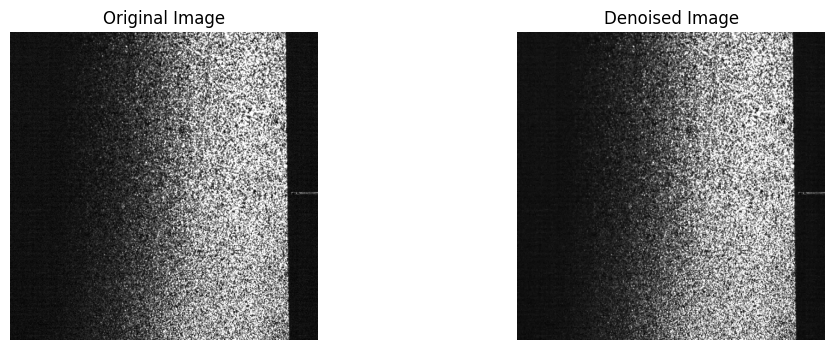

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.restoration import denoise_wavelet

# Load the image
image = cv2.imread(images_path[0], cv2.IMREAD_GRAYSCALE)

# Add noise
# noisy_image = random_noise(image, var=0.05**2)

# Denoise the image using wavelet denoising
denoised_image = denoise_wavelet(image, channel_axis=None)

# Display the images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(denoised_image, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Denoised Image')

plt.show()

## Optical Flow: Understanding Motion in Images

Optical flow is a technique in computer vision that helps us understand the motion of objects in a sequence of images or video frames. It essentially calculates the apparent motion of pixels between two frames, creating a vector field where each vector represents the direction and magnitude of motion at that point.

Our goal is to estimate the motion of particules and replace then the optical flow. So there are no point to use it again as pre-processing step. We better use dnn approaches that's SOTA and more robust.